In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install lbl2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 9.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

# Reddit

### Read Data

In [30]:
DATA_PATH="/content/drive/MyDrive/FYP/Data/train-test-data/train-clean.csv"
THETA_PATH="/content/drive/MyDrive/FYP/Data/STTM Intermediate Output/Reddit-All-LDA-50/reddit.theta"
ASSIGNMENTS_PATH="/content/drive/MyDrive/FYP/Data/STTM Intermediate Output/Reddit-All-LDA-50/reddit.topicAssignments"
TOP_WORDS="/content/drive/MyDrive/FYP/Data/STTM Intermediate Output/Reddit-All-LDA-50/reddit.topWords"

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

num_topics = 50

# Create column names according to the number of topics
topic_columns = [f"topic {i+1}" for i in range(num_topics)]

df = pd.read_csv(DATA_PATH)
df

,Unnamed: 0,document,class
0,31375,salam brother sister alhamdullilah get close f...,1
1,21364,interested islam quran bit muslim friend posit...,1
2,12362,advise realize desire healing come physical re...,0
3,10218,salamu alaykum start new job month ago field e...,1
4,45444,research reading sub hope recommendation try c...,0
...,...,...,...
89952,6265,abdullah bin salam say prophet come madinah pe...,1
89953,14896,coworker baptist day lunch team nice conversat...,0
89954,36830,aware series exist pretty ignore figure kid li...,0
89955,860,bismillah amp nbsp destroy thamud visible dwel...,1


In [32]:
import pandas as pd

# Read the data from the file
with open(THETA_PATH, 'r') as file:
    lines = file.readlines()

# Split the data into individual values and convert them to float
data = []
for line in lines:
    values = line.strip().split()
    data.extend([float(value) for value in values])

# Reshape the data into a 2D array with 50 columns
num_rows = len(data) // num_topics
reshaped_data = [data[i*num_topics:(i+1)*num_topics] for i in range(num_rows)]

# Create a DataFrame from the reshaped data
df2 = pd.DataFrame(reshaped_data)

# Display the DataFrame
df2

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.002128,0.002128,0.002128,0.002128,0.023404,0.002128,0.002128,0.002128,0.002128,0.002128,...,0.002128,0.002128,0.023404,0.002128,0.002128,0.002128,0.002128,0.002128,0.002128,0.002128
1,0.001389,0.001389,0.140278,0.001389,0.043056,0.001389,0.001389,0.001389,0.112500,0.001389,...,0.001389,0.001389,0.001389,0.001389,0.181944,0.001389,0.001389,0.001389,0.001389,0.001389
2,0.001220,0.001220,0.391463,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,...,0.001220,0.001220,0.001220,0.001220,0.001220,0.050000,0.001220,0.001220,0.001220,0.001220
3,0.000826,0.000826,0.025620,0.000826,0.223967,0.025620,0.190909,0.000826,0.000826,0.000826,...,0.000826,0.017355,0.000826,0.009091,0.000826,0.033884,0.000826,0.000826,0.215702,0.017355
4,0.001053,0.001053,0.001053,0.022105,0.001053,0.001053,0.001053,0.001053,0.001053,0.001053,...,0.011579,0.001053,0.001053,0.158947,0.011579,0.032632,0.001053,0.064211,0.022105,0.001053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89952,0.000575,0.000575,0.017816,0.006322,0.017816,0.075287,0.000575,0.000575,0.000575,0.144253,...,0.000575,0.000575,0.000575,0.000575,0.000575,0.000575,0.000575,0.000575,0.000575,0.012069
89953,0.000699,0.000699,0.000699,0.091608,0.007692,0.028671,0.000699,0.000699,0.105594,0.000699,...,0.000699,0.000699,0.273427,0.000699,0.000699,0.000699,0.028671,0.007692,0.000699,0.014685
89954,0.027273,0.001299,0.170130,0.014286,0.014286,0.001299,0.001299,0.001299,0.001299,0.001299,...,0.001299,0.001299,0.001299,0.092208,0.001299,0.001299,0.001299,0.001299,0.001299,0.001299
89955,0.000204,0.008384,0.092229,0.000204,0.000204,0.000204,0.000204,0.000204,0.059509,0.106544,...,0.000204,0.126994,0.000204,0.000204,0.000204,0.000204,0.000204,0.004294,0.000204,0.014519


In [33]:
df2["class"] = df["class"]
df2

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,class
0,0.002128,0.002128,0.002128,0.002128,0.023404,0.002128,0.002128,0.002128,0.002128,0.002128,...,0.002128,0.023404,0.002128,0.002128,0.002128,0.002128,0.002128,0.002128,0.002128,1
1,0.001389,0.001389,0.140278,0.001389,0.043056,0.001389,0.001389,0.001389,0.112500,0.001389,...,0.001389,0.001389,0.001389,0.181944,0.001389,0.001389,0.001389,0.001389,0.001389,1
2,0.001220,0.001220,0.391463,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,...,0.001220,0.001220,0.001220,0.001220,0.050000,0.001220,0.001220,0.001220,0.001220,0
3,0.000826,0.000826,0.025620,0.000826,0.223967,0.025620,0.190909,0.000826,0.000826,0.000826,...,0.017355,0.000826,0.009091,0.000826,0.033884,0.000826,0.000826,0.215702,0.017355,1
4,0.001053,0.001053,0.001053,0.022105,0.001053,0.001053,0.001053,0.001053,0.001053,0.001053,...,0.001053,0.001053,0.158947,0.011579,0.032632,0.001053,0.064211,0.022105,0.001053,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89952,0.000575,0.000575,0.017816,0.006322,0.017816,0.075287,0.000575,0.000575,0.000575,0.144253,...,0.000575,0.000575,0.000575,0.000575,0.000575,0.000575,0.000575,0.000575,0.012069,1
89953,0.000699,0.000699,0.000699,0.091608,0.007692,0.028671,0.000699,0.000699,0.105594,0.000699,...,0.000699,0.273427,0.000699,0.000699,0.000699,0.028671,0.007692,0.000699,0.014685,0
89954,0.027273,0.001299,0.170130,0.014286,0.014286,0.001299,0.001299,0.001299,0.001299,0.001299,...,0.001299,0.001299,0.092208,0.001299,0.001299,0.001299,0.001299,0.001299,0.001299,0
89955,0.000204,0.008384,0.092229,0.000204,0.000204,0.000204,0.000204,0.000204,0.059509,0.106544,...,0.126994,0.000204,0.000204,0.000204,0.000204,0.000204,0.004294,0.000204,0.014519,1


### Visualize Grouped Means

In [34]:
grouped_df = df2.groupby('class').mean()
grouped_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
class,,,,,,,,,,,,,,,,,,,,,
0,0.026371,0.012198,0.021868,0.020758,0.004096,0.016969,0.026047,0.016310,0.00863,0.002604,...,0.014841,0.002802,0.022638,0.019717,0.005207,0.023343,0.038846,0.043826,0.026836,0.018437
1,0.003752,0.016636,0.024922,0.018462,0.034460,0.020090,0.008819,0.002844,0.03633,0.037260,...,0.011367,0.023470,0.025922,0.039038,0.073961,0.008190,0.007404,0.010489,0.020094,0.011445


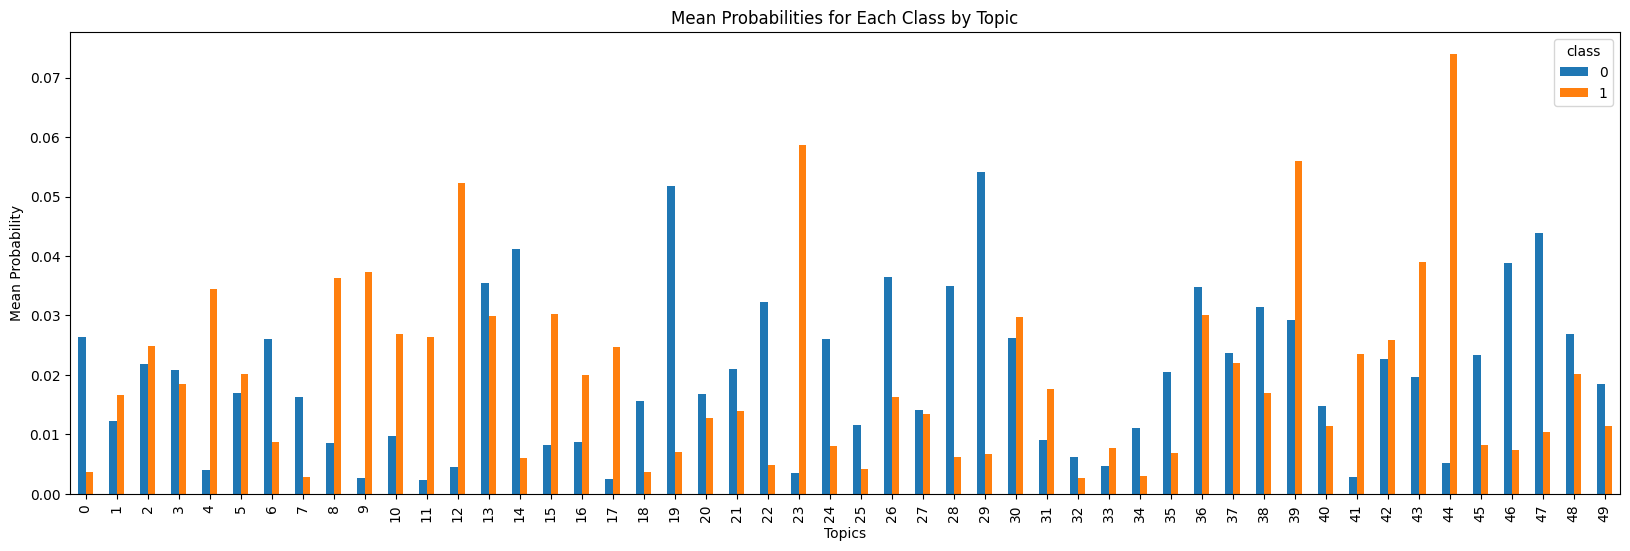

In [35]:
import matplotlib.pyplot as plt

ax = grouped_df.T.plot(kind='bar', figsize=(20, 6))
ax.set_ylabel('Mean Probability')
ax.set_xlabel('Topics')
ax.set_title('Mean Probabilities for Each Class by Topic')
plt.show()

### Process Data

In [36]:
import pandas as pd

# Finds peaks with a difference of 33% from the other colums
def check_differences(value, values):
    for other_value in values:
        if value * 0.0 > abs(value - other_value):
            return False
    return True

# Define a function to find columns with peaks
def find_columns_with_differences(row):
    # Initialize a list to store column indices
    different_columns = []

    # Iterate over each column
    for col in grouped_df.columns:
        # Get the value of the current column in the current row
        current_value = row[col]

        # Get the others values of the current column across all rows
        other_values = grouped_df[col].tolist()
        other_values.remove(current_value)

        if check_differences(current_value, other_values):
            different_columns.append(1)
        else:
            different_columns.append(0)

    return different_columns

# Apply the function row-wise to find columns with differences >= 33%
unique_columns = grouped_df.apply(find_columns_with_differences, axis=1)
unique_columns

class
0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
dtype: object

In [37]:
import pandas as pd

def get_topic_assignments():
    word_topic_assignments = []
    with open(ASSIGNMENTS_PATH, 'r') as f:
        for line in f:
            topics = list(map(int, line.strip().split()))
            word_topic_assignments.append(topics)
    return word_topic_assignments

# Get only Top words from the .topwords file from each selected topic
def get_top_words(row, unique_column):
    words = set()

    with open(TOP_WORDS, 'r') as f:
        data = f.readlines()
        print(data)
        for i, value in enumerate(unique_column):
            if value:
                words.update(data[i].rstrip().split(' '))
    return words

# Get all words from each selected topic
def get_all_words(documents, unique_column):
    words = set()
    assigments = get_topic_assignments()

    for index in documents.index:
        assignment = assigments[index]
        document = documents[index].split(' ')

        unique_words = []
        for i, word in enumerate(document):
            if unique_column[assignment[i]]:
                unique_words.append(word)
        words.update(unique_words)
    return words


df = pd.read_csv(DATA_PATH)
set0 = get_all_words(df[df['class']==0]['document'], unique_columns[0])
set1 = get_all_words(df[df['class']==1]['document'], unique_columns[1])

In [38]:
data={"class_index":[0, 1],
      "class_name":["Non-Islamic", "Islamic"],
    #   "keywords":[list(set0), list(set1), list(set2)],
    # Testing: What if we remove intersections between the sets
      "keywords":[list(set0 - set1), list(set1 - set0)],
      "number_of_keywords":[len(set0), len(set1)]}
labels = pd.DataFrame(data)
labels

,class_index,class_name,keywords,number_of_keywords
0,0,Non-Islamic,"[changdeokgung, wheezy, crother, lukasz, manas...",105300
1,1,Islamic,"[assalamoalykum, abbysinia, myislamicdream, kh...",83816


### Lbl2Vec

In [39]:
from gensim.utils import simple_preprocess

# doc: document text string
# returns tokenized document
# simple preprocess converts a document into a list of lowercase tokens, ignoring tokens that are too short or too long
# simple preprocess also removes numerical values as well as punctuations
def tokenize(doc):
    return simple_preprocess(doc, deacc=True, min_len=2, max_len=15)

In [40]:
from gensim.models.doc2vec import TaggedDocument

# tokenize and tag documents for Lbl2Vec training
# tagged_docs: list of tokens in a doc + doc's unique ID(doc_key)
df['tagged_docs'] = df.apply(lambda row: TaggedDocument(tokenize(row['document']), [str(row.name)]), axis=1)
# add doc_key column
df['doc_key'] = df.index.astype(str)
# add class_name column
df = df.merge(labels, left_on='class', right_on='class_index', how='left').drop(['class', 'keywords'], axis=1)
df

,Unnamed: 0,document,tagged_docs,doc_key,class_index,class_name,number_of_keywords
0,31375,salam brother sister alhamdullilah get close f...,"([salam, brother, sister, alhamdullilah, get, ...",0,1,Islamic,83816
1,21364,interested islam quran bit muslim friend posit...,"([interested, islam, quran, bit, muslim, frien...",1,1,Islamic,83816
2,12362,advise realize desire healing come physical re...,"([advise, realize, desire, healing, come, phys...",2,0,Non-Islamic,105300
3,10218,salamu alaykum start new job month ago field e...,"([salamu, alaykum, start, new, job, month, ago...",3,1,Islamic,83816
4,45444,research reading sub hope recommendation try c...,"([research, reading, sub, hope, recommendation...",4,0,Non-Islamic,105300
...,...,...,...,...,...,...,...
89952,6265,abdullah bin salam say prophet come madinah pe...,"([abdullah, bin, salam, say, prophet, come, ma...",89952,1,Islamic,83816
89953,14896,coworker baptist day lunch team nice conversat...,"([coworker, baptist, day, lunch, team, nice, c...",89953,0,Non-Islamic,105300
89954,36830,aware series exist pretty ignore figure kid li...,"([aware, series, exist, pretty, ignore, figure...",89954,0,Non-Islamic,105300
89955,860,bismillah amp nbsp destroy thamud visible dwel...,"([bismillah, amp, nbsp, destroy, thamud, visib...",89955,1,Islamic,83816


In [41]:
test_df = pd.read_csv("/content/drive/MyDrive/FYP/Data/train-test-data/test-clean-customstopwords.csv")
test_df['tagged_docs'] = test_df.apply(lambda row: TaggedDocument(tokenize(row['document']), [str(row.name)]), axis=1)
test_df['doc_key'] = test_df.index.astype(str)
test_df = test_df.merge(labels, left_on='class', right_on='class_index', how='left').drop(['class'], axis=1)
test_df

,document,subreddit,tagged_docs,doc_key,class_index,class_name,keywords,number_of_keywords
0,talk elderly italian woman dish mother cook po...,food,"([talk, elderly, italian, woman, dish, mother,...",0,0,Non-Islamic,"[changdeokgung, wheezy, crother, lukasz, manas...",105300
1,week chocolate cake mug immediately intrigue p...,food,"([week, chocolate, cake, mug, immediately, int...",1,0,Non-Islamic,"[changdeokgung, wheezy, crother, lukasz, manas...",105300
2,package spaghetti noodle angel hair ground bee...,food,"([package, spaghetti, noodle, angel, hair, gro...",2,0,Non-Islamic,"[changdeokgung, wheezy, crother, lukasz, manas...",105300
3,friend weekend bit cooking frustrated disorgan...,food,"([friend, weekend, bit, cooking, frustrated, d...",3,0,Non-Islamic,"[changdeokgung, wheezy, crother, lukasz, manas...",105300
4,serve prep time minute vegetable mandolin cook...,food,"([serve, prep, time, minute, vegetable, mandol...",4,0,Non-Islamic,"[changdeokgung, wheezy, crother, lukasz, manas...",105300
...,...,...,...,...,...,...,...,...
109564,abu hurairah report messenger peace offer pray...,Muslim,"([abu, hurairah, report, messenger, peace, off...",109564,1,Islamic,"[assalamoalykum, abbysinia, myislamicdream, kh...",83816
109565,mother celebrate pagan holiday solstice yule c...,Muslim,"([mother, celebrate, pagan, holiday, solstice,...",109565,1,Islamic,"[assalamoalykum, abbysinia, myislamicdream, kh...",83816
109566,asak limit option parent basically stop care b...,Muslim,"([asak, limit, option, parent, basically, stop...",109566,1,Islamic,"[assalamoalykum, abbysinia, myislamicdream, kh...",83816
109567,read quran figure question maybe million quest...,Muslim,"([read, quran, figure, question, maybe, millio...",109567,1,Islamic,"[assalamoalykum, abbysinia, myislamicdream, kh...",83816


In [42]:
train_df = df.copy()

In [43]:
from gensim.models.doc2vec import Doc2Vec
# Train Doc2Vec model:
# in order to get optimal Lbl2Vec results the given Doc2Vec model should be trained with the parameters “dbow_words=1” and “dm=0”.
doc2vec_model = Doc2Vec(documents=train_df['tagged_docs'], dbow_words=1, dm=0)

In [44]:
from lbl2vec import Lbl2Vec

# init model with parameters
Lbl2vec_model = Lbl2Vec(keywords_list=list(labels['keywords']), doc2vec_model=doc2vec_model,
                        label_names=list(labels['class_name']), similarity_threshold=0.30, min_num_docs=100, epochs=10)

# init model with parameters
# Lbl2vec_model = Lbl2Vec(keywords_list=list(labels['keywords']), tagged_documents=train_df['tagged_docs'],
#                         label_names=list(labels['class_name']), similarity_threshold=0.30, min_num_docs=100, epochs=20, min_count=10)

# train model
Lbl2vec_model.fit()

Output hidden; open in https://colab.research.google.com to view.

In [45]:
# predict similarity scores
model_docs_lbl_similarities = Lbl2vec_model.predict_model_docs()
model_docs_lbl_similarities

2024-05-09 11:57:05,132 - Lbl2Vec - INFO - Get document embeddings from model
2024-05-09 11:57:05,132 - Lbl2Vec - INFO - Get document embeddings from model
INFO:Lbl2Vec:Get document embeddings from model
2024-05-09 11:57:05,309 - Lbl2Vec - INFO - Calculate document<->label similarities
2024-05-09 11:57:05,309 - Lbl2Vec - INFO - Calculate document<->label similarities
INFO:Lbl2Vec:Calculate document<->label similarities


,doc_key,most_similar_label,highest_similarity_score,Non-Islamic,Islamic
0,0,Islamic,0.717348,0.629894,0.717348
1,1,Islamic,0.608338,0.569089,0.608338
2,2,Islamic,0.444542,0.438138,0.444542
3,3,Non-Islamic,0.526156,0.526156,0.508448
4,4,Non-Islamic,0.541573,0.541573,0.431455
...,...,...,...,...,...
89952,89952,Islamic,0.468310,0.412059,0.468310
89953,89953,Non-Islamic,0.502732,0.502732,0.478463
89954,89954,Non-Islamic,0.533836,0.533836,0.447277
89955,89955,Islamic,0.452215,0.356502,0.452215


In [46]:
new_docs_lbl_similarities = Lbl2vec_model.predict_new_docs(tagged_docs=test_df['tagged_docs'])
new_docs_lbl_similarities

2024-05-09 11:59:04,740 - Lbl2Vec - INFO - Calculate document embeddings
2024-05-09 11:59:04,740 - Lbl2Vec - INFO - Calculate document embeddings
INFO:Lbl2Vec:Calculate document embeddings
2024-05-09 12:02:51,938 - Lbl2Vec - INFO - Calculate document<->label similarities
2024-05-09 12:02:51,938 - Lbl2Vec - INFO - Calculate document<->label similarities
INFO:Lbl2Vec:Calculate document<->label similarities


,doc_key,most_similar_label,highest_similarity_score,Non-Islamic,Islamic
0,0,Non-Islamic,0.460251,0.460251,0.408785
1,1,Non-Islamic,0.488522,0.488522,0.396718
2,2,Non-Islamic,0.492267,0.492267,0.421546
3,3,Non-Islamic,0.525404,0.525404,0.446524
4,4,Non-Islamic,0.526121,0.526121,0.449498
...,...,...,...,...,...
109564,109564,Islamic,0.527279,0.444991,0.527279
109565,109565,Islamic,0.494565,0.420943,0.494565
109566,109566,Non-Islamic,0.394428,0.394428,0.393602
109567,109567,Islamic,0.648591,0.603851,0.648591


### Evaluation

In [47]:
test_df

,document,subreddit,tagged_docs,doc_key,class_index,class_name,keywords,number_of_keywords
0,talk elderly italian woman dish mother cook po...,food,"([talk, elderly, italian, woman, dish, mother,...",0,0,Non-Islamic,"[changdeokgung, wheezy, crother, lukasz, manas...",105300
1,week chocolate cake mug immediately intrigue p...,food,"([week, chocolate, cake, mug, immediately, int...",1,0,Non-Islamic,"[changdeokgung, wheezy, crother, lukasz, manas...",105300
2,package spaghetti noodle angel hair ground bee...,food,"([package, spaghetti, noodle, angel, hair, gro...",2,0,Non-Islamic,"[changdeokgung, wheezy, crother, lukasz, manas...",105300
3,friend weekend bit cooking frustrated disorgan...,food,"([friend, weekend, bit, cooking, frustrated, d...",3,0,Non-Islamic,"[changdeokgung, wheezy, crother, lukasz, manas...",105300
4,serve prep time minute vegetable mandolin cook...,food,"([serve, prep, time, minute, vegetable, mandol...",4,0,Non-Islamic,"[changdeokgung, wheezy, crother, lukasz, manas...",105300
...,...,...,...,...,...,...,...,...
109564,abu hurairah report messenger peace offer pray...,Muslim,"([abu, hurairah, report, messenger, peace, off...",109564,1,Islamic,"[assalamoalykum, abbysinia, myislamicdream, kh...",83816
109565,mother celebrate pagan holiday solstice yule c...,Muslim,"([mother, celebrate, pagan, holiday, solstice,...",109565,1,Islamic,"[assalamoalykum, abbysinia, myislamicdream, kh...",83816
109566,asak limit option parent basically stop care b...,Muslim,"([asak, limit, option, parent, basically, stop...",109566,1,Islamic,"[assalamoalykum, abbysinia, myislamicdream, kh...",83816
109567,read quran figure question maybe million quest...,Muslim,"([read, quran, figure, question, maybe, millio...",109567,1,Islamic,"[assalamoalykum, abbysinia, myislamicdream, kh...",83816


In [48]:
from sklearn.metrics import f1_score

# merge DataFrames to compare the predicted and true topic labels
evaluation_test = new_docs_lbl_similarities.merge(test_df, left_on='doc_key', right_on='doc_key')
y_true_test = evaluation_test['class_name']
y_pred_test = evaluation_test['most_similar_label']
print('F1 score:',f1_score(y_true_test, y_pred_test, average='micro'))

F1 score: 0.8623789575518623


In [49]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_true_test, y_pred_test)

# Print the classification report
print(report)

              precision    recall  f1-score   support

     Islamic       0.26      0.76      0.39      6215
 Non-Islamic       0.98      0.87      0.92    103354

    accuracy                           0.86    109569
   macro avg       0.62      0.81      0.65    109569
weighted avg       0.94      0.86      0.89    109569

